# Geothermal Development in the US Basin and Range

### Compiled October 2020 from open data sources

A work in progress

Data compilation and analysis by Irene Wallis

Send any corrections for plant or reservior MWe to irene@cubicearth.nz

In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Installed MWe for each reservoir

Reporting of installed capacity in the public space is somewhat varied, likely because of variation through time and different conventions for these numbers (almost always without any statement about the convention used). Where the installed capacity of a reservoir as reported on a company website or presentation does not match the sum of the plant capacities complied from open data sources, the company data is used. 

'development-byreservoir.csv' is all reservoirs that could be included inside the wider Basin and Range province (including the Walker Lane)

'development-byreservoir-trimmed.csv' removes those reservoirs that are clearly associated with shallow crustal magma (eg Mammoth Mountain) and the Walker Lane systems (i.e., Coso and Steamboat).  

Steamboat Springs, Casa Diablo (has an active volcano - Mammoth Mountain), Coso (not considered Basin and Range), Cove Fort, and Roosevelt are thought to have shallow crustal magmatic sources (Faulds and Hinz, 2015). Further refinement likely required. 

In [131]:
#reserviors = pd.read_csv(r'development-byreservoir.csv')
reserviors = pd.read_csv(r'development-byreservoir-trimmed.csv')
reserviors

,Reservior,State,Installed_MWe,FirstGen
0,Amedee,California,1.600,1988
1,Beowawe,Nevada,19.900,1985
2,Blue Mountain,Nevada,49.500,2009
3,Bradys,Nevada,26.100,1992
4,Cove Fort,Utah,25.000,2013
5,Desert Peak,Nevada,23.000,1985
6,Dixie Valley,Nevada,72.000,1988
7,Don Campbell,Nevada,42.000,2013
8,Florida Canyon,Nevada,0.075,2012
9,Goodsprings,Nevada,7.000,2010


In [132]:
reserviors['Installed_MWe'].describe()

count     30.000000
mean      23.978167
std       28.375155
min        0.040000
25%        3.250000
50%       21.200000
75%       29.025000
max      143.000000
Name: Installed_MWe, dtype: float64

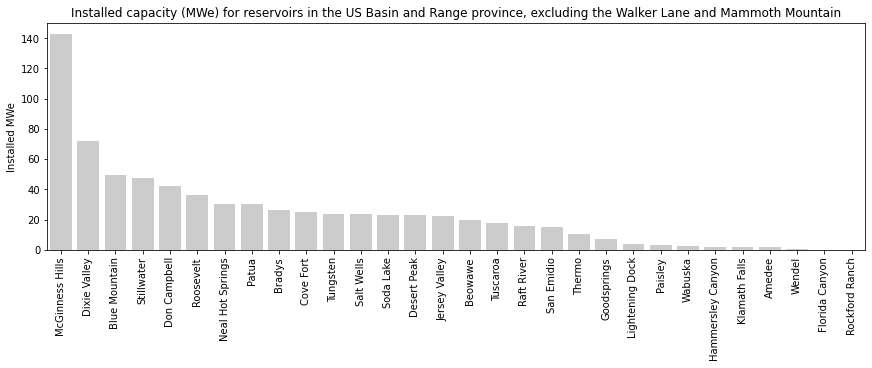

In [140]:
plt.figure(
    figsize=(12,5),
    constrained_layout=True,
)

sortedbymw = reserviors.sort_values(
    by = 'Installed_MWe',
    ascending=False
)

sns.barplot(
    x = 'Reservior',     
    y = 'Installed_MWe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Installed capacity (MWe) for reservoirs in the US Basin and Range province, excluding the Walker Lane and Mammoth Mountain')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.savefig('MWe-Per-Reservoir.png',dpi=400,bbox_inches='tight')
plt.show()

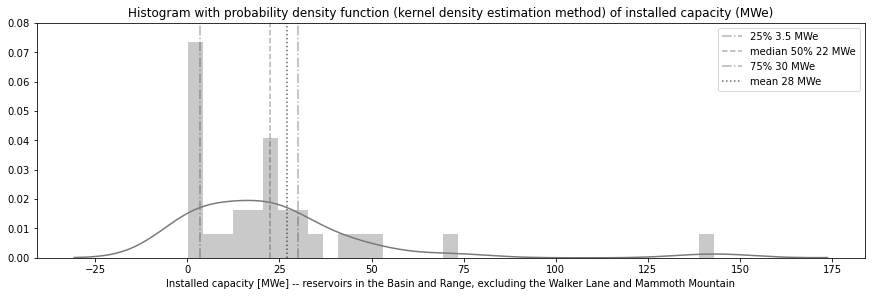

In [141]:
plt.figure(
    figsize=(12,4),
    constrained_layout=True,
)

sns.distplot(
    reserviors.Installed_MWe,
    bins = 35,
    color = '#7a7a7a',
) 

plt.vlines(3.5,0,0.08,linestyle='-.',alpha=0.3,label='25% 3.5 MWe')
plt.vlines(22.5,0,0.08,linestyle='--',alpha=0.3,label='median 50% 22 MWe')
plt.vlines(30,0,0.08,linestyle='-.',alpha=0.3,label='75% 30 MWe')

plt.vlines(27,0,0.08,linestyle=':',alpha=0.6,label='mean 28 MWe')

plt.title('Histogram with probability density function (kernel density estimation method) of installed capacity (MWe)')

plt.xlabel('Installed capacity [MWe] -- reservoirs in the Basin and Range, excluding the Walker Lane and Mammoth Mountain')

plt.ylim(0,0.08)

plt.legend()

plt.savefig('MWe-Per-Reservoir-PDF.png',dpi=400,bbox_inches='tight')
plt.show()

The data presented here is installed (nameplate) capacity. Many of the reservoirs have not sustained generation at that level. At times, the economic power plant size drives what is installed rather than the results from subsurface resource definition. In other cases, reservoirs have evolved in unforeseen ways (eg greater pressure decline or cooling than forecasted). Subsequently, there is a good argument that the true distribution would have a lower median. 

We normally expect natural phenomena to have a lognormal distribution. In this plot we have somewhat normal distribution with a long and uneven tail to the right. This may indicate that we either have several populations or that the available data under-sampled the true underlying phenomena (subsurface resource capacity in the Basin and Range). 

Given the results of resent exploration and development in the Basin and Range (eg McGinness Hills), there is some argument that a number of hidden (blind) systems above the median are yet to be discovered. However, this is speculation beyond this publicly available data on installed capacity. 

## Power plant MWe 

The geothermal power plant list below includes all reservoirs that fit into the wider province, such that the Walker Lane and magmatic systems have not yet been filtered out. 

In [135]:
plants = pd.read_csv(r'development-byplant.csv')
plants

,Reservior,Name,Comissioned,Type,Capacity_Mwe,NetGen_Mwe,Status,Owner
0,Amedee,Amedee,1988,binary,1.60,NaN,NaN,NaN
1,Beowawe,Beowawe,1985,double flash,18.00,NaN,NaN,Beowawe Power LLC
2,Beowawe,Beowawe 2,2011,binary,1.90,NaN,NaN,Terra-Gen Power
3,Blue Mountain,Blue Mountain Faulkner,2009,binary,50.00,NaN,NaN,Altarock
4,Bradys,Brady Hot Springs,1992,double flash,26.10,NaN,NaN,Ormat
5,Coso,Coso Finance Partners Geothermal Plant,1987,flash,90.20,NaN,NaN,NaN
6,Coso,Coso Energy Developers Geothermal Plant,1988,flash,90.00,NaN,NaN,NaN
7,Coso,Coso Power Developers Geothermal Plant,1989,flash,90.00,NaN,NaN,NaN
8,Cove Fort,Cove Fort,2013,binary,25.00,NaN,NaN,ENEL Green Power (Oski Energy phase 2?)
9,Desert Peak,Desert Peak (decommissioned),1985,flash,9.90,NaN,decommissioned 1985,Unknown


In [136]:
plants['Capacity_Mwe'].describe()

count    56.000000
mean     20.288750
std      22.360689
min       0.040000
25%       4.000000
50%      13.200000
75%      26.000000
max      90.200000
Name: Capacity_Mwe, dtype: float64

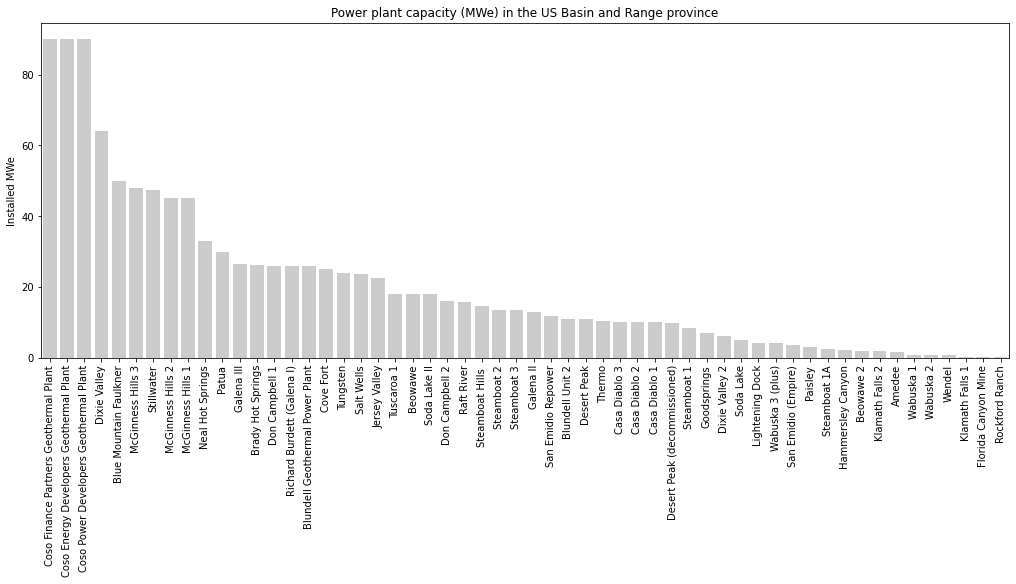

In [137]:
plt.figure(
    figsize=(14,8),
    constrained_layout=True,
)

sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

sns.barplot(
    x = 'Name',     
    y = 'Capacity_Mwe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Power plant capacity (MWe) in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

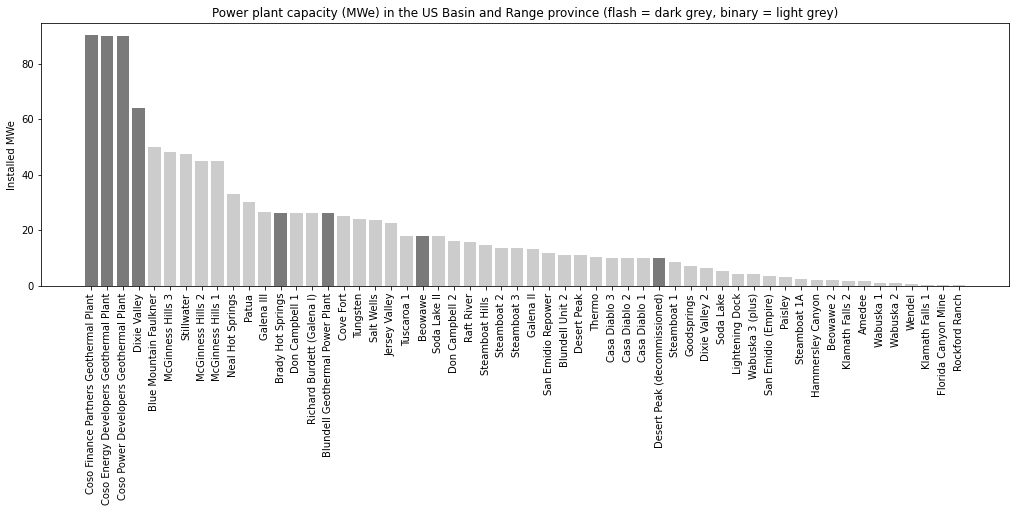

In [138]:
sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

x = sortedbymw.Name
y = sortedbymw.Capacity_Mwe

planttype = sortedbymw.Type
col = []
for val in planttype:
    if val == 'binary':
        col.append('#cccccc')
    elif val == 'flash':
        col.append('#7a7a7a')
    else:
        col.append('#7a7a7a')

plt.figure(
    figsize=(14,7),
    constrained_layout=True,
)

plt.bar(x,y, color = col)

plt.title('Power plant capacity (MWe) in the US Basin and Range province (flash = dark grey, binary = light grey)')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

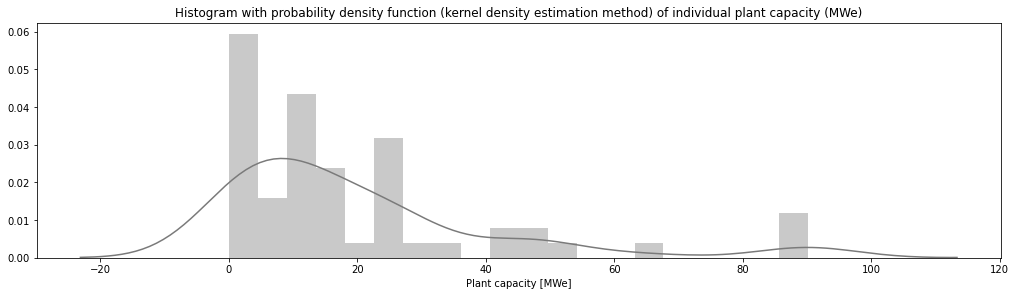

In [139]:
plt.figure(
    figsize=(14,4),
    constrained_layout=True,
)

sns.distplot(
    plants.Capacity_Mwe,
    bins = 20,
    color = '#7a7a7a',
) 

plt.title('Histogram with probability density function (kernel density estimation method) of individual plant capacity (MWe)')

plt.xlabel('Plant capacity [MWe]')

plt.show()

## Data Sources

TBC